# Support Vector Machines

-Support Vector Machines are classifiers that can classify datasets by a introducing an optimal hyperplane between the multi-dimensional data points. 

-An hyperplane is a multi-dimensional structure that extends a two-dimensional plane

-If the datasets consists of two dimensional dataset, then an estimate line is fit that provides the best classification on the dataset. By "best classification", it is to be noted that a plane that not necessarily provides perfect classification of all points in the training dataset but fits a criterion such that the line is farthest from all points

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/svm.PNG)

https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/

-there are many number of lines can be drawn between two groups(red&green above) but the svm choose which has HIGH MARGIN DISTANCE

-HIGH MARGING DISTANCE is the distance between the support vector planes and the middle hyperplane between them

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/svm2.PNG)

Here svm chooses Z2 plane,since it has high margin distance

# Cross-validation(k-fold)

Cross-validation (CV) is a standard technique for adjusting hyperparameters of predictive models

http://scikit-learn.org/stable/modules/cross_validation.html

In the basic approach, called k-fold CV, the training set is split into k smaller sets 

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.

# Non-linear classification(kernel svm)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/svmk.PNG)

# ![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/svmkk.PNG)

![alt text](https://i.imgur.com/Cj3gw.png)

## Example:1 Social_network_ads.csv dataset(its a LINEAR SVM CLASSFICATION[similar to logistic regres])

### Step1- load the import statements

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step-2 load the dataset

In [192]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/Social_Network_Ads.csv')

In [193]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [194]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [195]:
#for gender catergorical variable
Gender=pd.get_dummies(data['Gender'],drop_first=True)
print(Gender)
data['Gender_cat']=Gender

     Male
0       1
1       1
2       0
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      1
21      0
22      1
23      0
24      1
25      1
26      1
27      0
28      1
29      1
..    ...
370     0
371     1
372     0
373     1
374     0
375     0
376     0
377     0
378     1
379     0
380     1
381     1
382     0
383     1
384     0
385     1
386     0
387     1
388     1
389     0
390     1
391     1
392     0
393     1
394     0
395     0
396     1
397     0
398     1
399     0

[400 rows x 1 columns]


### Step-3 visualize data(see which is more seperable for classification)

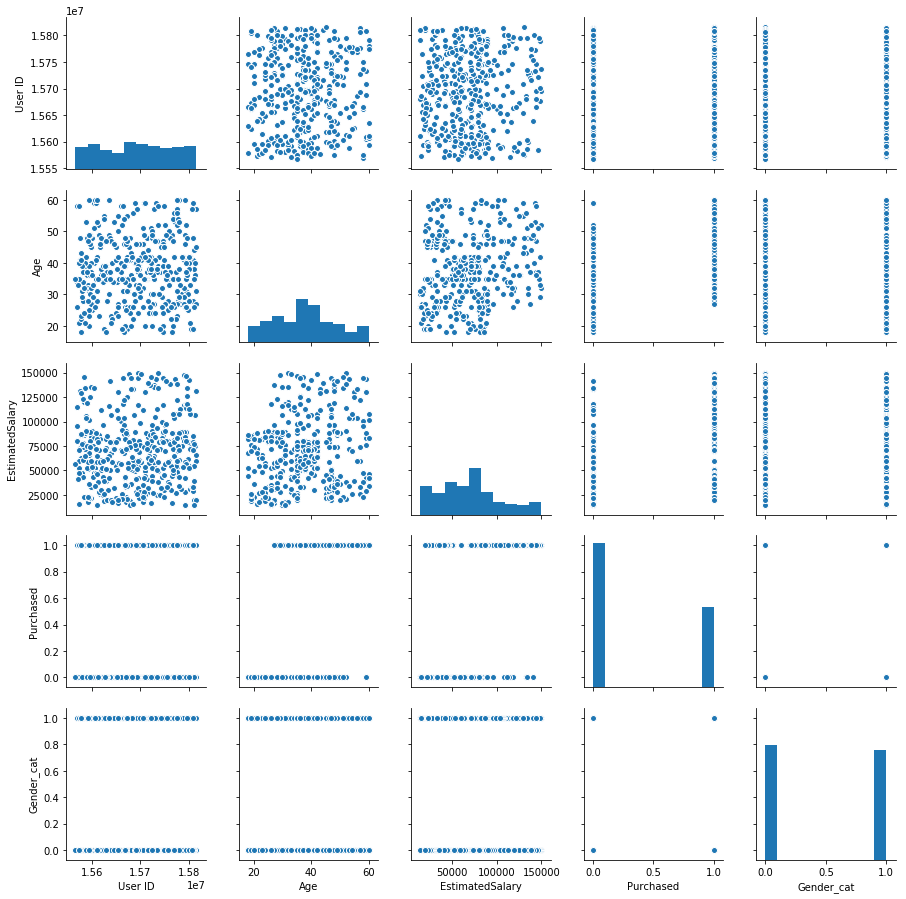

In [196]:
sns.pairplot(data)

### Step-4 split data into train and test set &FEATURE SCALING

In [197]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_cat
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [198]:
x=data[['Age','EstimatedSalary','Gender_cat']]
y=data['Purchased']

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=21)

In [200]:
x_test

,Age,EstimatedSalary,Gender_cat
106,26,35000,0
9,35,65000,0
61,25,87000,1
224,35,60000,0
37,30,49000,1
242,50,88000,0
313,49,141000,0
52,29,83000,0
347,54,108000,0
239,53,143000,0


In [201]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [202]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [203]:
x_test

array([[-0.92561193, -0.89522933, -0.91412058],
       [-0.09504051,  0.00268033, -0.91412058],
       [-1.01789765,  0.66114741,  1.09394758],
       [-0.09504051, -0.14697128, -0.91412058],
       [-0.55646908, -0.47620482,  1.09394758],
       [ 1.28924519,  0.69107773, -0.91412058],
       [ 1.19695948,  2.27738479, -0.91412058],
       [-0.64875479,  0.54142612, -0.91412058],
       [ 1.65838805,  1.28968417, -0.91412058],
       [ 1.56610233,  2.33724544, -0.91412058],
       [ 0.27410234,  0.42170483, -0.91412058],
       [-0.74104051, -0.83536869, -0.91412058],
       [ 0.92010234, -1.28432352, -0.91412058],
       [ 0.27410234,  0.93052031,  1.09394758],
       [ 0.45867377,  0.21219258,  1.09394758],
       [-1.47932621,  0.5114958 , -0.91412058],
       [ 0.27410234,  0.2421229 , -0.91412058],
       [ 1.01238805, -1.19453255,  1.09394758],
       [ 0.36638806,  0.30198355,  1.09394758],
       [-0.27961194,  0.12240162, -0.91412058],
       [-1.20246907, -1.10474158, -0.914

In [204]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=23) #for linear classification we use kerner-'linear'
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False)

# Step-5 Predicting the testvalues

In [205]:
y_predtest=svm.predict(x_test)

# Step-6 Evaluationg model confusion_matrix and classifiacton report

In [206]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[80, 13],
       [ 7, 34]], dtype=int64)

In [207]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

          0       0.92      0.86      0.89        93
          1       0.72      0.83      0.77        41

avg / total       0.86      0.85      0.85       134



In [208]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.8507462686567164


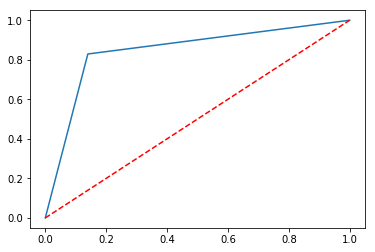

In [209]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')


In [210]:
y_predtest

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

# Example-2 same above example using k-fold cross validation

In [211]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

#Setting the test size and train size
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

scoring = 'accuracy'
models=SVC()
kfold = model_selection.KFold(n_splits=10, random_state=seed)

cv_results = model_selection.cross_val_score(models, X_train, Y_train, cv=kfold, scoring=scoring)
results=(cv_results)
accuracy_train = cv_results.mean()
print(accuracy_train)

0.659375


In [212]:
# Make predictions on test dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
accuracy_test= accuracy_score(Y_test, predictions)
print(accuracy_test)

0.6875


# Example-3 iris dataset(kernel svm[rbf])

In [213]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [215]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [216]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


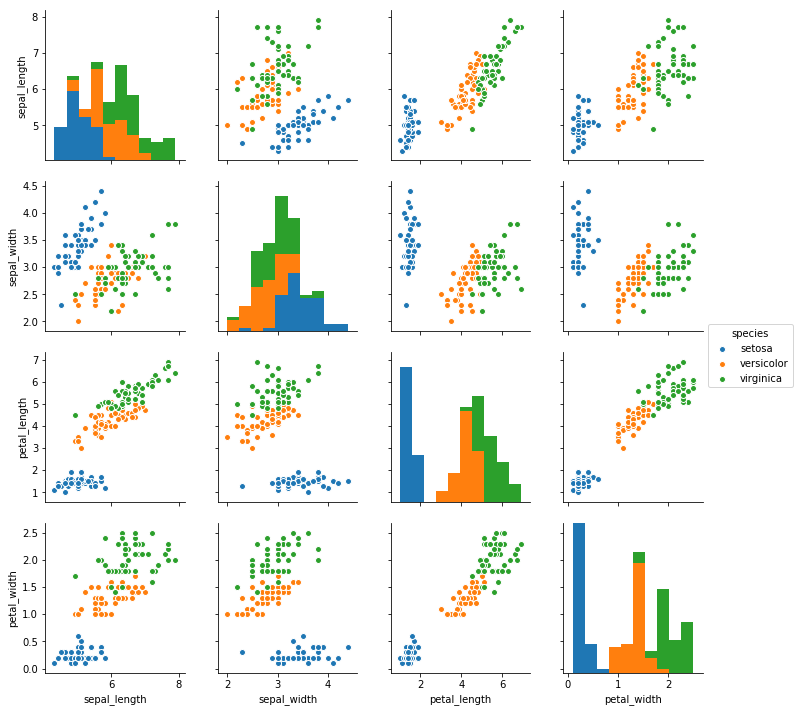

In [217]:
sns.pairplot(iris,hue='species')

Setosa is more sepearable

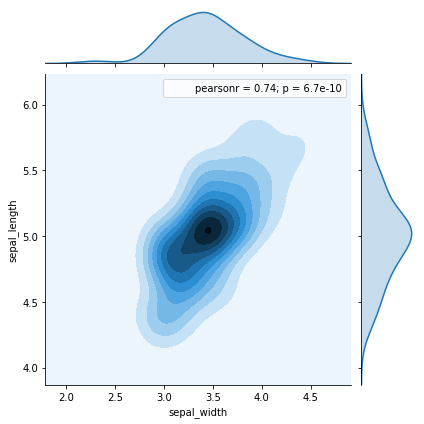

In [218]:
setosa = iris[iris['species']=='setosa']
sns.jointplot( setosa['sepal_width'], setosa['sepal_length'],kind='kde')

In [219]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [220]:
x = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris['species']

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
x_test

,sepal_length,sepal_width,petal_length,petal_width
55,5.7,2.8,4.5,1.3
64,5.6,2.9,3.6,1.3
21,5.1,3.7,1.5,0.4
101,5.8,2.7,5.1,1.9
112,6.8,3.0,5.5,2.1
33,5.5,4.2,1.4,0.2
135,7.7,3.0,6.1,2.3
123,6.3,2.7,4.9,1.8
46,5.1,3.8,1.6,0.2
90,5.5,2.6,4.4,1.2


In [222]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [223]:
X_test

array([[ 0.40452227,  1.28140778, -1.02532046],
       [-1.43887037, -0.37415783,  0.97530483],
       [-0.20994194,  0.18873448, -1.02532046],
       [-0.82440615,  0.58607022,  0.97530483],
       [ 0.30211157,  0.58607022,  0.97530483],
       [ 1.12139719, -1.36749719,  0.97530483],
       [ 1.01898649,  2.27474714, -1.02532046],
       [-0.10753124,  0.05628923, -1.02532046],
       [ 2.14550422,  0.61918154, -1.02532046],
       [-0.51717405, -0.00993339, -1.02532046],
       [-1.54128107, -0.70527095, -1.02532046],
       [ 1.94068281, -1.43371982, -1.02532046],
       [-0.72199545, -1.79794425, -1.02532046],
       [ 1.53104   ,  0.08940054,  0.97530483],
       [ 0.30211157,  0.35429104, -1.02532046],
       [ 2.24791492, -0.90393882,  0.97530483],
       [ 0.19970087, -0.34104652,  0.97530483],
       [-1.02922756,  0.32117973,  0.97530483],
       [ 0.40452227,  0.18873448, -1.02532046],
       [ 1.01898649,  0.15562317,  0.97530483],
       [-0.92681686,  0.45362498, -1.025

In [224]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=12)
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

In [225]:
y_predtest=svm.predict(x_test)

In [226]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 18]], dtype=int64)

In [227]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.92      1.00      0.96        12
  virginica       1.00      0.95      0.97        19

avg / total       0.98      0.98      0.98        45



# Example-3 Titanic dataset

## Step1: load the import statements

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step2: Loading and analyzing the dataset and removing missing values

In [229]:
train=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/titanic_train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/titanic_test.csv')

In [230]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [232]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing 177 missing values in age column with avg age

In [233]:
avg=train["Age"].mean()
train['Age'].fillna(value=avg,inplace=True)

We will drop the cabin column since it has many missing values

In [234]:
train.drop('Cabin',axis=1,inplace=True)

we will drop the missing values in embarked column since it has only 2 missing values

In [235]:
train.dropna(inplace=True)

In [236]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

## Step3:- visualizing the dataset

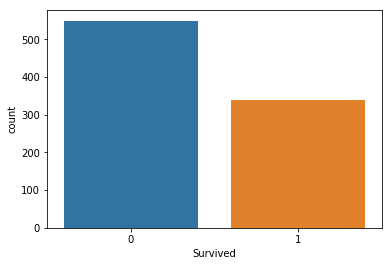

In [237]:
sns.countplot('Survived',data=train)

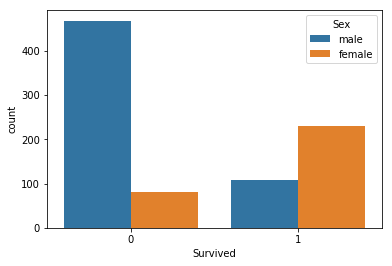

In [238]:
sns.countplot('Survived',data=train,hue='Sex')

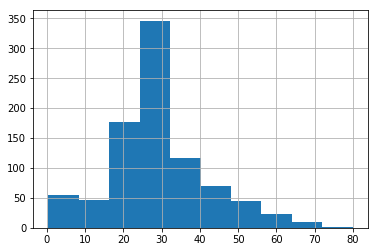

In [239]:
train['Age'].hist()

## Step-4 categorical values

In [240]:
sex_cat=pd.get_dummies(train['Sex'],drop_first=True) #drop_first is used to prevent dummy variable trap(multi collinearity)
sex_cat

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [241]:
Embarked_cat=pd.get_dummies(train['Embarked'],drop_first=True)
Embarked_cat

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [242]:
train['sex_cat']=sex_cat

In [243]:
train[['Q','S']]=Embarked_cat

In [244]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_cat,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [245]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

## Step-5 spliting data into train and test datasets and feature scaling

In [246]:
from sklearn.model_selection import train_test_split
y=train['Survived']
x=train[['PassengerId','Pclass','Age','SibSp','Parch','Fare','sex_cat','Q','S']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [247]:
X_test

array([[ 0.40452227,  1.28140778, -1.02532046],
       [-1.43887037, -0.37415783,  0.97530483],
       [-0.20994194,  0.18873448, -1.02532046],
       [-0.82440615,  0.58607022,  0.97530483],
       [ 0.30211157,  0.58607022,  0.97530483],
       [ 1.12139719, -1.36749719,  0.97530483],
       [ 1.01898649,  2.27474714, -1.02532046],
       [-0.10753124,  0.05628923, -1.02532046],
       [ 2.14550422,  0.61918154, -1.02532046],
       [-0.51717405, -0.00993339, -1.02532046],
       [-1.54128107, -0.70527095, -1.02532046],
       [ 1.94068281, -1.43371982, -1.02532046],
       [-0.72199545, -1.79794425, -1.02532046],
       [ 1.53104   ,  0.08940054,  0.97530483],
       [ 0.30211157,  0.35429104, -1.02532046],
       [ 2.24791492, -0.90393882,  0.97530483],
       [ 0.19970087, -0.34104652,  0.97530483],
       [-1.02922756,  0.32117973,  0.97530483],
       [ 0.40452227,  0.18873448, -1.02532046],
       [ 1.01898649,  0.15562317,  0.97530483],
       [-0.92681686,  0.45362498, -1.025

In [248]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

## Step-6 Fitting the training dataset

In [251]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=22)

In [254]:
fit=svc.fit(x_train,y_train)
fit

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=22, shrinking=True,
  tol=0.001, verbose=False)

## Cross validation 

lets check accuracy of training fit through 8 folds

In [259]:
from sklearn import model_selection
cross_auc=model_selection.cross_val_score(svc,x_train, y_train, cv=5)

In [260]:
cross_auc

array([0.824     , 0.824     , 0.80645161, 0.82258065, 0.85483871])

In [261]:
cross_auc.mean()

0.8263741935483871

hence we got 82 accuracy

## Step-7 predicting the testdata set

In [264]:
y_predtest=svc.predict(x_test)

In [265]:
y_predtest

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [268]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predtest)
print(cr)

             precision    recall  f1-score   support

          0       0.78      0.90      0.84       157
          1       0.82      0.63      0.71       110

avg / total       0.79      0.79      0.78       267



In [269]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predtest)
cm

array([[142,  15],
       [ 41,  69]], dtype=int64)

In [270]:
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.7902621722846442
